In [1]:
## VH PDF distributions

In [1]:
%matplotlib inline
#%config InlineBackend.figure_format='retina'

In [2]:
from matplotlib import rc
rc('font', **{'size':60})
#rc('text', usetex=True)
rc('xtick', labelsize=60) #20 
rc('ytick', labelsize=60) #20
rc('axes', titlesize=60)    # fontsize of the axes title
rc('axes', labelsize=60) #24    # fontsize of the x and y labels

import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
import xarray as xr
from xgcm import Grid

In [3]:
nlayers = 4

In [18]:
from dask.distributed import Client

c=Client(local_directory = '/scratch/e14/qo9901/') 
c 

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39289 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/39289/status,
Dashboard: /proxy/39289/status,Workers: 4
Total threads: 4,Total memory: 200.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37609,Workers: 4
Dashboard: /proxy/39289/status,Total threads: 4
Started: Just now,Total memory: 200.00 GiB
Comm: tcp://127.0.0.1:37061,Total threads: 1
Dashboard: /proxy/42389/status,Memory: 50.00 GiB
Nanny: tcp://127.0.0.1:33649,


In [5]:
from matplotlib import ticker, cm

In [6]:
import dask
dask.config.set(**{'array.slicing.split_large_chunks': False})

In [7]:
def hydraulic_area_calc(filename, nlayers, t1,t2):
     
    FileList = '/g/data/hh5/tmp/qo9901_JPOlayeredASC/' + filename + '/output*/prog_daily.nc'
    FileList = ['/g/data/hh5/tmp/qo9901_JPOlayeredASC/' + filename + '/output' + '{0:03}'.format(i) + '/prog.nc' for i in range(t1,t2)]
    print(FileList)

    #if zdiag
    dsx_prog_daily = xr.open_mfdataset(FileList, combine='by_coords', chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True)
    dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)
    h_area = (dsx_prog_daily.e.isel(zi = -1, Time = -1).sel( yh = -100, method = 'nearest') - dsx_prog_daily.e.isel(zi = -1, Time = -1,xh = 0).sel( yh = -100, method = 'nearest')).integrate('xh').values*-1
    return h_area

In [8]:
# computing hydraulic area
h_area_fresh = np.zeros(6)
h_area_fresh[0] = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01', 4,  0,1)
h_area_fresh[1] = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01', 4, 50,70)
h_area_fresh[2] = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig5p0e+01', 4, 50,70)
h_area_fresh[3] = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig7p5e+01', 4, 50,70)
h_area_fresh[4] = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+02', 4,  0,1)
h_area_fresh[5] = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p2e+02', 4,  0,1)


['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output000/prog.nc']
['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output050/prog.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output051/prog.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output052/prog.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output053/prog.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output054/prog.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output055/prog.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output056/prog.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_

In [9]:
h_area_freshSTEEP = np.zeros(5)
h_area_freshSTEEP[0] = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01', 4, 0,1)
h_area_freshSTEEP[1] = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01', 4,0,1)
h_area_freshSTEEP[2] = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01', 4,20,30)
h_area_freshSTEEP[3] = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig7p5e+01', 4,40,50)
h_area_freshSTEEP[4] = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02', 4, 0,1)

['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output000/prog.nc']
['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01/output000/prog.nc']
['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01/output020/prog.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01/output021/prog.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01/output022/prog.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01/output023/prog.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01/output024/prog.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01/output025/prog.nc', '/g/data/hh5/tmp/qo99

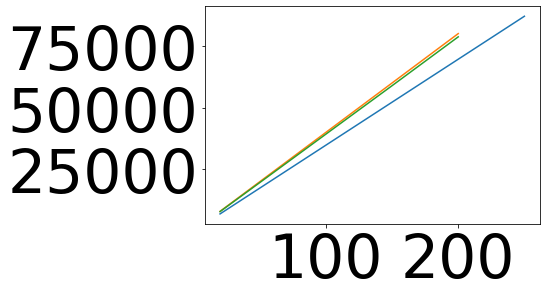

In [10]:
plt.plot( [20,50,100,150,200,250], h_area_fresh)
ls = [20,50,100,150,200]
plt.plot( [20,50,100,150,200], [400*i for i in ls]) ## linear
plt.plot( [20,50,100,150,200], h_area_freshSTEEP)

#plt.plot([100,150,200],h_area_freshSTEEP[2:5], marker = 'x')

https://en.wikipedia.org/wiki/Skewness

In [10]:
from scipy.stats import skew

In [11]:
def skewness_compare(filename,t1,t2, file):
    # calculating skewness for time between t1 and t2 fr original experiment years
    if file == 'daily' :   
        FileList = ['/g/data/hh5/tmp/qo9901_JPOlayeredASC/' + filename + '/output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(t1,t2)]
        print('daily')
        print(FileList)
    elif file == 'chunked':
        FileList = ['/g/data/hh5/tmp/qo9901_JPOlayeredASC/' + filename + '/output' + '{0:03}'.format(i) + '/prog_chunked.nc' for i in range(t1,t2)]
        print('chunked')
        print(FileList)

    #if zdiag
    dsx_prog_daily = xr.open_mfdataset(FileList, combine = 'by_coords',chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True, preprocess = lambda d: d[['uh', 'vh']])
    dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)
    test = (dsx_prog_daily.vh.isel( zl = nlayers - 2).sel(yq = -100, method = 'nearest').sum(dim = 'xh') )
    skewness = skew(test)
    dsx_prog_daily = 0
    return skew(test)

In [12]:
def skewness_compare_rerun(filename,t1,t2, file):
    # calculating skewness for time between t1 and t2 for additional experiment years
    if file == 'daily' :   
        FileList = ['/scratch/v45/qo9901/mom6/archive/' + filename + '/output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(t1,t2)]
        print('daily')
        print(FileList)
    elif file == 'chunked':
        FileList = ['/scratch/v45/qo9901/mom6/archive/' + filename + '/output' + '{0:03}'.format(i) + '/prog_chunked.nc' for i in range(t1,t2)]
        print('chunked')
        print(FileList)

    #if zdiag
    dsx_prog_daily = xr.open_mfdataset(FileList, combine = 'by_coords',chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True, preprocess = lambda d: d[['uh', 'vh']])
    dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)
    test = (dsx_prog_daily.vh.isel( zl = nlayers - 2).sel(yq = -100, method = 'nearest').sum(dim = 'xh') )
    skewness = skew(test)
    dsx_prog_daily = 0
    return skew(test)

In [13]:
def skewness_combine_total(filename,t1,t2, file):
    if file == 'daily' :   
        FileList = ['/g/data/hh5/tmp/qo9901_JPOlayeredASC/' + filename + '/output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(t1,t2)]
        #print('daily')
        #print(FileList)
    elif file == 'chunked':
        FileList = ['/g/data/hh5/tmp/qo9901_JPOlayeredASC/' + filename + '/output' + '{0:03}'.format(i) + '/prog_chunked.nc' for i in range(t1,t2)]
        #print('chunked')
        #print(FileList)
   
    #if zdiag
    dsx_prog_daily = xr.open_mfdataset(FileList, combine = 'by_coords',chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True, preprocess = lambda d: d[['uh', 'vh']])
    dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)
    test = (dsx_prog_daily.vh.isel( zl = nlayers - 2).sel(yq = -100, method = 'nearest').sum(dim = 'xh') )

    FileList = ['/scratch/v45/qo9901/mom6/archive/' + filename + '/output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(t2,t2 +ny)]
    print(FileList)
    dsx_prog_dailyrerun = xr.open_mfdataset(FileList, combine = 'by_coords',chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True, preprocess = lambda d: d[['uh', 'vh']])
    dsx_prog_dailyrerun.coords['Time'] = dsx_prog_dailyrerun.coords['Time']/(365)

    test_rerun = (dsx_prog_dailyrerun.vh.isel( zl = nlayers - 2).sel(yq = -100, method = 'nearest').sum(dim = 'xh') )
    print(test)
    print(test_rerun)
    #test_total = xr.Dataset.merge(test, test_rerun)
    test_total = xr.concat([test,test_rerun],dim = 'Time')
    print(test_total)
    skewness = skew(test_total)
    dsx_prog_daily = 0
    dsx_prog_dailyrerun = 0
    return skewness

In [14]:
def skewness_segments_70(filename,t1,t2, file):
    # calculating skewness for dataset of 70 years of daily data - additional 20 year run for narrowest canyon cases as outlined in Ong et al. 2024
    # daily data is subsamples for overlapping intervals of 20 years
    interval = 20
    tstart = t1
    tend = t1+interval
    i = 0
    skewness_matrix = np.zeros(6)
    for i in range(6):
        print(tstart,tend,i)
        if tend <= t2:
            if file == 'daily' :   
                FileList = ['/g/data/hh5/tmp/qo9901_JPOlayeredASC/' + filename + '/output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(tstart,tend)]
                #print('daily')
                #print(FileList)
            elif file == 'chunked':
                FileList = ['/g/data/hh5/tmp/qo9901_JPOlayeredASC/' + filename + '/output' + '{0:03}'.format(i) + '/prog_chunked.nc' for i in range(tstart,tend)]
                #print('chunked')
                #print(FileList)
           
            #if zdiag
            dsx_prog_daily = xr.open_mfdataset(FileList, combine = 'by_coords',chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True, preprocess = lambda d: d[['uh', 'vh']])
            dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)
            test = (dsx_prog_daily.vh.isel( zl = nlayers - 2).sel(yq = -100, method = 'nearest').sum(dim = 'xh') )
        elif tend>t2 and tstart>t2:
            print('only rerun')
            ## only rerun data
            FileList = ['/scratch/v45/qo9901/mom6/archive/' + filename + '/output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(tstart,tend)]
            print(FileList)
            dsx_prog_dailyrerun = xr.open_mfdataset(FileList, combine = 'by_coords',chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True, preprocess = lambda d: d[['uh', 'vh']])
            dsx_prog_dailyrerun.coords['Time'] = dsx_prog_dailyrerun.coords['Time']/(365)
        
            test = (dsx_prog_dailyrerun.vh.isel( zl = nlayers - 2).sel(yq = -100, method = 'nearest').sum(dim = 'xh') )
            print(test)
        elif tend>t2 and tstart<t2:
            #combination
            print('combination')
            if file == 'daily' :   
                FileList = ['/g/data/hh5/tmp/qo9901_JPOlayeredASC/' + filename + '/output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(tstart,int(tstart + interval/2))]
                #print('daily')
                #print(FileList)
            elif file == 'chunked':
                FileList = ['/g/data/hh5/tmp/qo9901_JPOlayeredASC/' + filename + '/output' + '{0:03}'.format(i) + '/prog_chunked.nc' for i in range(tstart,int(tstart + interval/2))]
            dsx_prog_daily = xr.open_mfdataset(FileList, combine = 'by_coords',chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True, preprocess = lambda d: d[['uh', 'vh']])
            dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)
            test_old = (dsx_prog_daily.vh.isel( zl = nlayers - 2).sel(yq = -100, method = 'nearest').sum(dim = 'xh') )
            #new runs overlap
            FileList = ['/scratch/v45/qo9901/mom6/archive/' + filename + '/output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(int(tstart + interval/2),tend)]
            print(FileList)
            dsx_prog_dailyrerun = xr.open_mfdataset(FileList, combine = 'by_coords',chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True, preprocess = lambda d: d[['uh', 'vh']])
            dsx_prog_dailyrerun.coords['Time'] = dsx_prog_dailyrerun.coords['Time']/(365)
        
            test_rerun = (dsx_prog_dailyrerun.vh.isel( zl = nlayers - 2).sel(yq = -100, method = 'nearest').sum(dim = 'xh') )
            test = xr.concat([test_old,test_rerun],dim = 'Time')
            print(test)
        
        
        skewness = skew(test)
        dsx_prog_daily = 0
        dsx_prog_dailyrerun = 0
        print(skewness)

        skewness_matrix[i] = skewness
        tend = int(tend + interval/2)
        tstart = int(tstart + interval/2)
    return skewness_matrix

In [15]:
def skewness_segments_50(filename,t1,t2, file):
    # calculating skewness for dataset of 50 years of daily data
    # daily data is subsamples for overlapping intervals of 20 years
    interval = 20
    tstart = t1
    tend = t1+interval
    i = 0
    skewness_matrix = np.zeros(4)
    for i in range(4):
        print(tstart,tend,i)
        if file == 'daily' :   
            FileList = ['/g/data/hh5/tmp/qo9901_JPOlayeredASC/' + filename + '/output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(tstart,tend)]
            #print('daily')
            #print(FileList)
        elif file == 'chunked':
            FileList = ['/g/data/hh5/tmp/qo9901_JPOlayeredASC/' + filename + '/output' + '{0:03}'.format(i) + '/prog_chunked.nc' for i in range(tstart,tend)]
            #print('chunked')
            #print(FileList)
       
        #if zdiag
        dsx_prog_daily = xr.open_mfdataset(FileList, combine = 'by_coords',chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True, preprocess = lambda d: d[['uh', 'vh']])
        dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)
        test = (dsx_prog_daily.vh.isel( zl = nlayers - 2).sel(yq = -100, method = 'nearest').sum(dim = 'xh') )
        print('test')
        skewness = skew(test)
        print('skew')
        dsx_prog_daily = 0
        dsx_prog_dailyrerun = 0

        print(skewness)

        skewness_matrix[i] = skewness
        tend = int(tend + interval/2)
        tstart = int(tstart + interval/2)


    return skewness_matrix

In [16]:
skewness_fresh_total = np.zeros((6,6))
skewness_fresh_total[0,:] = skewness_segments_70('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01', 80,130, 'chunked')
skewness_fresh_total[1,:] = skewness_segments_70('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01', 50,100, 'chunked')
skewness_fresh_50 = np.zeros((6,4))
skewness_fresh_50[2,:] = skewness_segments_50('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig5p0e+01', 50,100, 'chunked')
skewness_fresh_50[3,:] = skewness_segments_50('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig7p5e+01', 50,100, 'daily')
skewness_fresh_50[4,:] = skewness_segments_50('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+02', 80,130, 'chunked')
skewness_fresh_50[5,:] = skewness_segments_50('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p2e+02', 30,80, 'daily')

80 100 0


2024-02-02 13:13:16,347 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/distributed/process.py", line 188, in _run
    target(*args, **kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/distributed/nanny.py", line 981, in _run
    asyncio.run(run())
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  F

KeyboardInterrupt: 

In [17]:
import gc
c.run(gc.collect)

{}

In [18]:
skewness_freshSTEEP_total = np.zeros((5,6))
skewness_freshSTEEP_total[0,:] = skewness_segments_70('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01', int(30 ),80, 'daily')
skewness_freshSTEEP_50 =  np.zeros((5,4))
skewness_freshSTEEP_50[1,:] = skewness_segments_50('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01', int(30 ),80, 'daily')
skewness_freshSTEEP_50[2,:] = skewness_segments_50('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01', int(30 ),80, 'daily') #30,80
skewness_freshSTEEP_50[3,:] = skewness_segments_50('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig7p5e+01', int(30 ),80, 'daily')
skewness_freshSTEEP_50[4,:] = skewness_segments_50('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02', int(51 ),101, 'daily')

30 50 0
-7.728378660183488
40 60 1
-8.535976818171374
50 70 2
-2.978681515899346
60 80 3
-3.081227014104931
70 90 4
combination
['/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output080/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output081/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output082/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output083/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output084/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output085/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output086/prog_daily.nc', '/s

In [19]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:36243': 73,
 'tcp://127.0.0.1:37061': 73,
 'tcp://127.0.0.1:38031': 73,
 'tcp://127.0.0.1:45085': 73}

### Skewness calculations without overlapping sections

In [28]:
skewness_fresh_total = np.zeros(6)
ny = 25 # 25 years to split data
skewness_fresh_total[0] = skewness_combine_total('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01', 80,int(80 + 2*ny), 'chunked')
skewness_fresh_total[1] = skewness_combine_total('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01', 50,int(50 + 2*ny), 'chunked')
skewness_fresh_total[2] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig5p0e+01', 50,int(50 + 2*ny), 'chunked')
skewness_fresh_total[3] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig7p5e+01', 50,int(50 + 2*ny), 'daily')
skewness_fresh_total[4] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+02', 80,int(80 + 2*ny), 'chunked')
skewness_fresh_total[5] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p2e+02', 30,int(30 + 2*ny), 'daily')

['/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output130/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output131/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output132/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output133/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output134/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output135/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output136/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output137/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_

In [29]:
skewness_fresh_total

array([ -8.57269404, -10.95553446,  -4.08851273,  -3.92993432,
        -3.27443567,  -2.37645039])

In [43]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:38305': 52,
 'tcp://127.0.0.1:42001': 52,
 'tcp://127.0.0.1:42539': 52,
 'tcp://127.0.0.1:43285': 52}

In [44]:
skewness_freshSTEEP_total = np.zeros(5)
skewness_freshSTEEP_total[0] = skewness_combine_total('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01', int(30 ),int(30 + 2*ny), 'daily')
skewness_freshSTEEP_total[1] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01', int(30 ),int(30 + 2*ny), 'daily')
skewness_freshSTEEP_total[2] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01', int(30 ),int(30 + 2*ny), 'daily') #30,80
skewness_freshSTEEP_total[3] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig7p5e+01', int(30 ),int(30 + 2*ny), 'daily')
skewness_freshSTEEP_total[4] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02', int(51 ),int(51 + 2*ny), 'daily')

['/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output080/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output081/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output082/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output083/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output084/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output085/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output086/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output087/prog_daily.nc', '/scrat

In [45]:
skewness_freshSTEEP_total

array([-5.60563816, -5.69902187, -3.48099207, -3.41065836, -2.43014796])

In [21]:
skewness_fresh_total

array([ -7.41744149, -12.33228183,  -4.08851273,  -3.92993432,
        -3.27443567,  -2.37645039])

In [13]:
skewness_fresh_1_25 = np.zeros(6)
ny = 25 # 25 years to split data
skewness_fresh_1_25[0] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01', 80,int(80 + ny), 'chunked')
skewness_fresh_1_25[1] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01', 50,int(50 + ny), 'chunked')
skewness_fresh_1_25[2] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig5p0e+01', 50,int(50 + ny), 'chunked')
skewness_fresh_1_25[3] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig7p5e+01', 50,int(50 + ny), 'daily')
skewness_fresh_1_25[4] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+02', 80,int(80 + ny), 'chunked')
skewness_fresh_1_25[5] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p2e+02', 30,int(30 + ny), 'daily')

chunked
['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output080/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output081/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output082/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output083/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output084/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output085/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output086/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output087/prog_chun

In [14]:
skewness_fresh_2_25 = np.zeros(6)
ny = 25 # 25 years to split data
skewness_fresh_2_25[0] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01', int(80 + ny),int(80 + 2*ny), 'chunked')
skewness_fresh_2_25[1] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01', int(50 + ny),int(50 + 2*ny), 'chunked')
skewness_fresh_2_25[2] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig5p0e+01', int(50 + ny),int(50 + 2*ny), 'chunked')
skewness_fresh_2_25[3] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig7p5e+01', int(50 + ny),int(50 + 2*ny), 'daily')
skewness_fresh_2_25[4] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+02', int(80 + ny),int(80 + 2*ny), 'chunked')
skewness_fresh_2_25[5] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p2e+02', int(30 + ny),int(30 + 2*ny), 'daily')

chunked
['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output105/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output106/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output107/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output108/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output109/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output110/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output111/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output112/prog_chun

In [23]:
skewness_fresh_3_25 = np.zeros(6)
ny = 25 # 25 years to split data
skewness_fresh_3_25[0] = skewness_compare_rerun('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01', int(80 + 2*ny),int(80 + 3*ny), 'daily')
skewness_fresh_3_25[1] = skewness_compare_rerun('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01', int(50 + 2*ny),int(50 + 3*ny), 'daily')
skewness_fresh_3_25[2] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig5p0e+01', int(50 + ny),int(50 + 2*ny), 'chunked')
skewness_fresh_3_25[3] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig7p5e+01', int(50 + ny),int(50 + 2*ny), 'daily')
skewness_fresh_3_25[4] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+02', int(80 + ny),int(80 + 2*ny), 'chunked')
skewness_fresh_3_25[5] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p2e+02', int(30 + ny),int(30 + 2*ny), 'daily')

daily
['/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output130/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output131/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output132/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output133/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output134/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output135/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output136/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig1p0e+01/output137/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_

In [18]:
skewness_freshSTEEP_1_25 = np.zeros(5)
skewness_freshSTEEP_1_25[0] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01', 30,int(30 + ny), 'daily')
skewness_freshSTEEP_1_25[1] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01', 30,int(30 + ny), 'daily')
skewness_freshSTEEP_1_25[2] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01', 30,int(30 + ny), 'daily') #30,80
skewness_freshSTEEP_1_25[3] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig7p5e+01', 30,int(30 + ny), 'daily')
skewness_freshSTEEP_1_25[4] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02', 51,int(51 + ny), 'daily')

daily
['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output030/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output031/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output032/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output033/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output034/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output035/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output036/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0

In [19]:
skewness_freshSTEEP_2_25 = np.zeros(5)
skewness_freshSTEEP_2_25[0] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01', int(30 + ny),int(30 + 2*ny), 'daily')
skewness_freshSTEEP_2_25[1] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01', int(30 + ny),int(30 + 2*ny), 'daily')
skewness_freshSTEEP_2_25[2] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01', int(30 + ny),int(30 + 2*ny), 'daily') #30,80
skewness_freshSTEEP_2_25[3] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig7p5e+01', int(30 + ny),int(30 + 2*ny), 'daily')
skewness_freshSTEEP_2_25[4] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02', int(51 + ny),int(51 + 2*ny), 'daily')

daily
['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output055/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output056/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output057/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output058/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output059/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output060/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output061/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0

In [24]:
skewness_freshSTEEP_3_25 = np.zeros(5)
skewness_freshSTEEP_3_25[0] = skewness_compare_rerun('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01', int(30 + 2*ny),int(30 + 3*ny), 'daily')
skewness_freshSTEEP_3_25[1] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01', int(30 + ny),int(30 + 2*ny), 'daily')
skewness_freshSTEEP_3_25[2] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01', int(30 + ny),int(30 + 2*ny), 'daily') #30,80
skewness_freshSTEEP_3_25[3] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig7p5e+01', int(30 + ny),int(30 + 2*ny), 'daily')
skewness_freshSTEEP_3_25[4] = skewness_compare('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02', int(51 + ny),int(51 + 2*ny), 'daily')

daily
['/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output080/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output081/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output082/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output083/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output084/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output085/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output086/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/output087/prog_daily.nc', '

In [20]:
#skewness_freshSTEEP_1_25 = skewness_freshSTEEP

In [21]:
np.savetxt('skewness_fresh_total.csv', skewness_fresh_total, delimiter=',')
np.savetxt('skewness_fresh_50.csv', skewness_fresh_50, delimiter=',')
np.savetxt('skewness_freshSTEEP_total.csv', skewness_freshSTEEP_total, delimiter=',')
np.savetxt('skewness_freshSTEEP_50.csv', skewness_fresh_50, delimiter=',')


In [25]:
np.savetxt('skewness_fresh_1_25.csv', skewness_fresh_1_25, delimiter=',')
np.savetxt('skewness_fresh_2_25.csv', skewness_fresh_2_25, delimiter=',')
np.savetxt('skewness_fresh_3_25.csv', skewness_fresh_3_25, delimiter=',') 

In [26]:
np.savetxt('skewness_freshSTEEP_1_25.csv', skewness_freshSTEEP_1_25, delimiter=',')
np.savetxt('skewness_freshSTEEP_2_25.csv', skewness_freshSTEEP_2_25, delimiter=',')
np.savetxt('skewness_freshSTEEP_3_25.csv', skewness_freshSTEEP_3_25, delimiter=',')

## hydraulic area of case with no canyon 
"zero canyon"

In [17]:
h_area_freshzero = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular', 4, 0,1)

['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular/output000/prog.nc']


## loading skewness of experiments without overlapping sections

In [20]:
polewardarray_fresh_lat_ds = xr.open_mfdataset('/g/data/v45/qo9901/layeredASFpaper_ncfile_all/poleward_gaussian.nc', combine='by_coords',  chunks={"Time": 1000},decode_times=False, engine='netcdf4', parallel=True) #, decode_times=False,
polewardarray_fresh_latSTEEP_ds = xr.open_mfdataset('/g/data/v45/qo9901/layeredASFpaper_ncfile_all/poleward_steep.nc', combine='by_coords',  chunks={"Time": 1000},decode_times=False, engine='netcdf4', parallel=True) #, decode_times=False,

In [21]:
polewardarray_fresh_lat = polewardarray_fresh_lat_ds.value.load().values
polewardarray_fresh_latSTEEP = polewardarray_fresh_latSTEEP_ds.value.load().values


In [22]:
polewardarray_fresh_latSTEEP

array([  -997.72864,  -3210.4153 , -20117.273  , -60280.094  ,
       -95224.77   ], dtype=float32)

In [23]:
polewardarray_fresh_latzero_ds = xr.open_mfdataset('/g/data/v45/qo9901/layeredASFpaper_ncfile_all/zero_canyon.nc', combine='by_coords',  chunks={"Time": 1000},decode_times=False, engine='netcdf4', parallel=True) #, decode_times=False,
polewardarray_fresh_latzero = polewardarray_fresh_latzero_ds.value.load().values


In [24]:
h_area_freshzero = hydraulic_area_calc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular', 4, 0,1)


['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular/output000/prog.nc']


## Calculate median of skewness for the 20 year interval skewness

In [25]:
skewness_freshSTEEP_50 = np.genfromtxt('skewness_freshSTEEP_50.csv', delimiter=',')
skewness_freshSTEEP_total = np.genfromtxt('skewness_freshSTEEP_total.csv', delimiter=',')
skewness_fresh_50 = np.genfromtxt('skewness_fresh_50.csv', delimiter=',')
skewness_fresh_total = np.genfromtxt('skewness_fresh_total.csv', delimiter=',')

In [26]:
median_construct_STEEP = np.concatenate((np.median(skewness_freshSTEEP_total[:1,:],axis = 1),np.median(skewness_freshSTEEP_50[2:,:],axis = 1)))
median_construct  = np.concatenate((np.median(skewness_fresh_total[:2,:],axis = 1), np.median(skewness_fresh_50[2:,:],axis = 1)))
median_construct_STEEP

array([-3.80656464, -4.04269305, -3.73742865, -3.29403412, -2.40393122])

In [25]:
np.tile(h_area_freshSTEEP[1:]/10**3,(4,1))

array([[19.64824487, 39.2766449 , 58.90306921, 78.68490564],
       [19.64824487, 39.2766449 , 58.90306921, 78.68490564],
       [19.64824487, 39.2766449 , 58.90306921, 78.68490564],
       [19.64824487, 39.2766449 , 58.90306921, 78.68490564]])

In [27]:
skewness_freshSTEEP_50[2:,:]

array([[-4.35365571, -3.94777559, -4.13761052, -3.9255482 ],
       [-4.58786029, -3.61731861, -3.85753869, -2.51895714],
       [-2.74496196, -2.85690501, -4.05388255, -3.73116323],
       [-2.05259701, -2.94705867, -2.56750932, -2.24035313]])

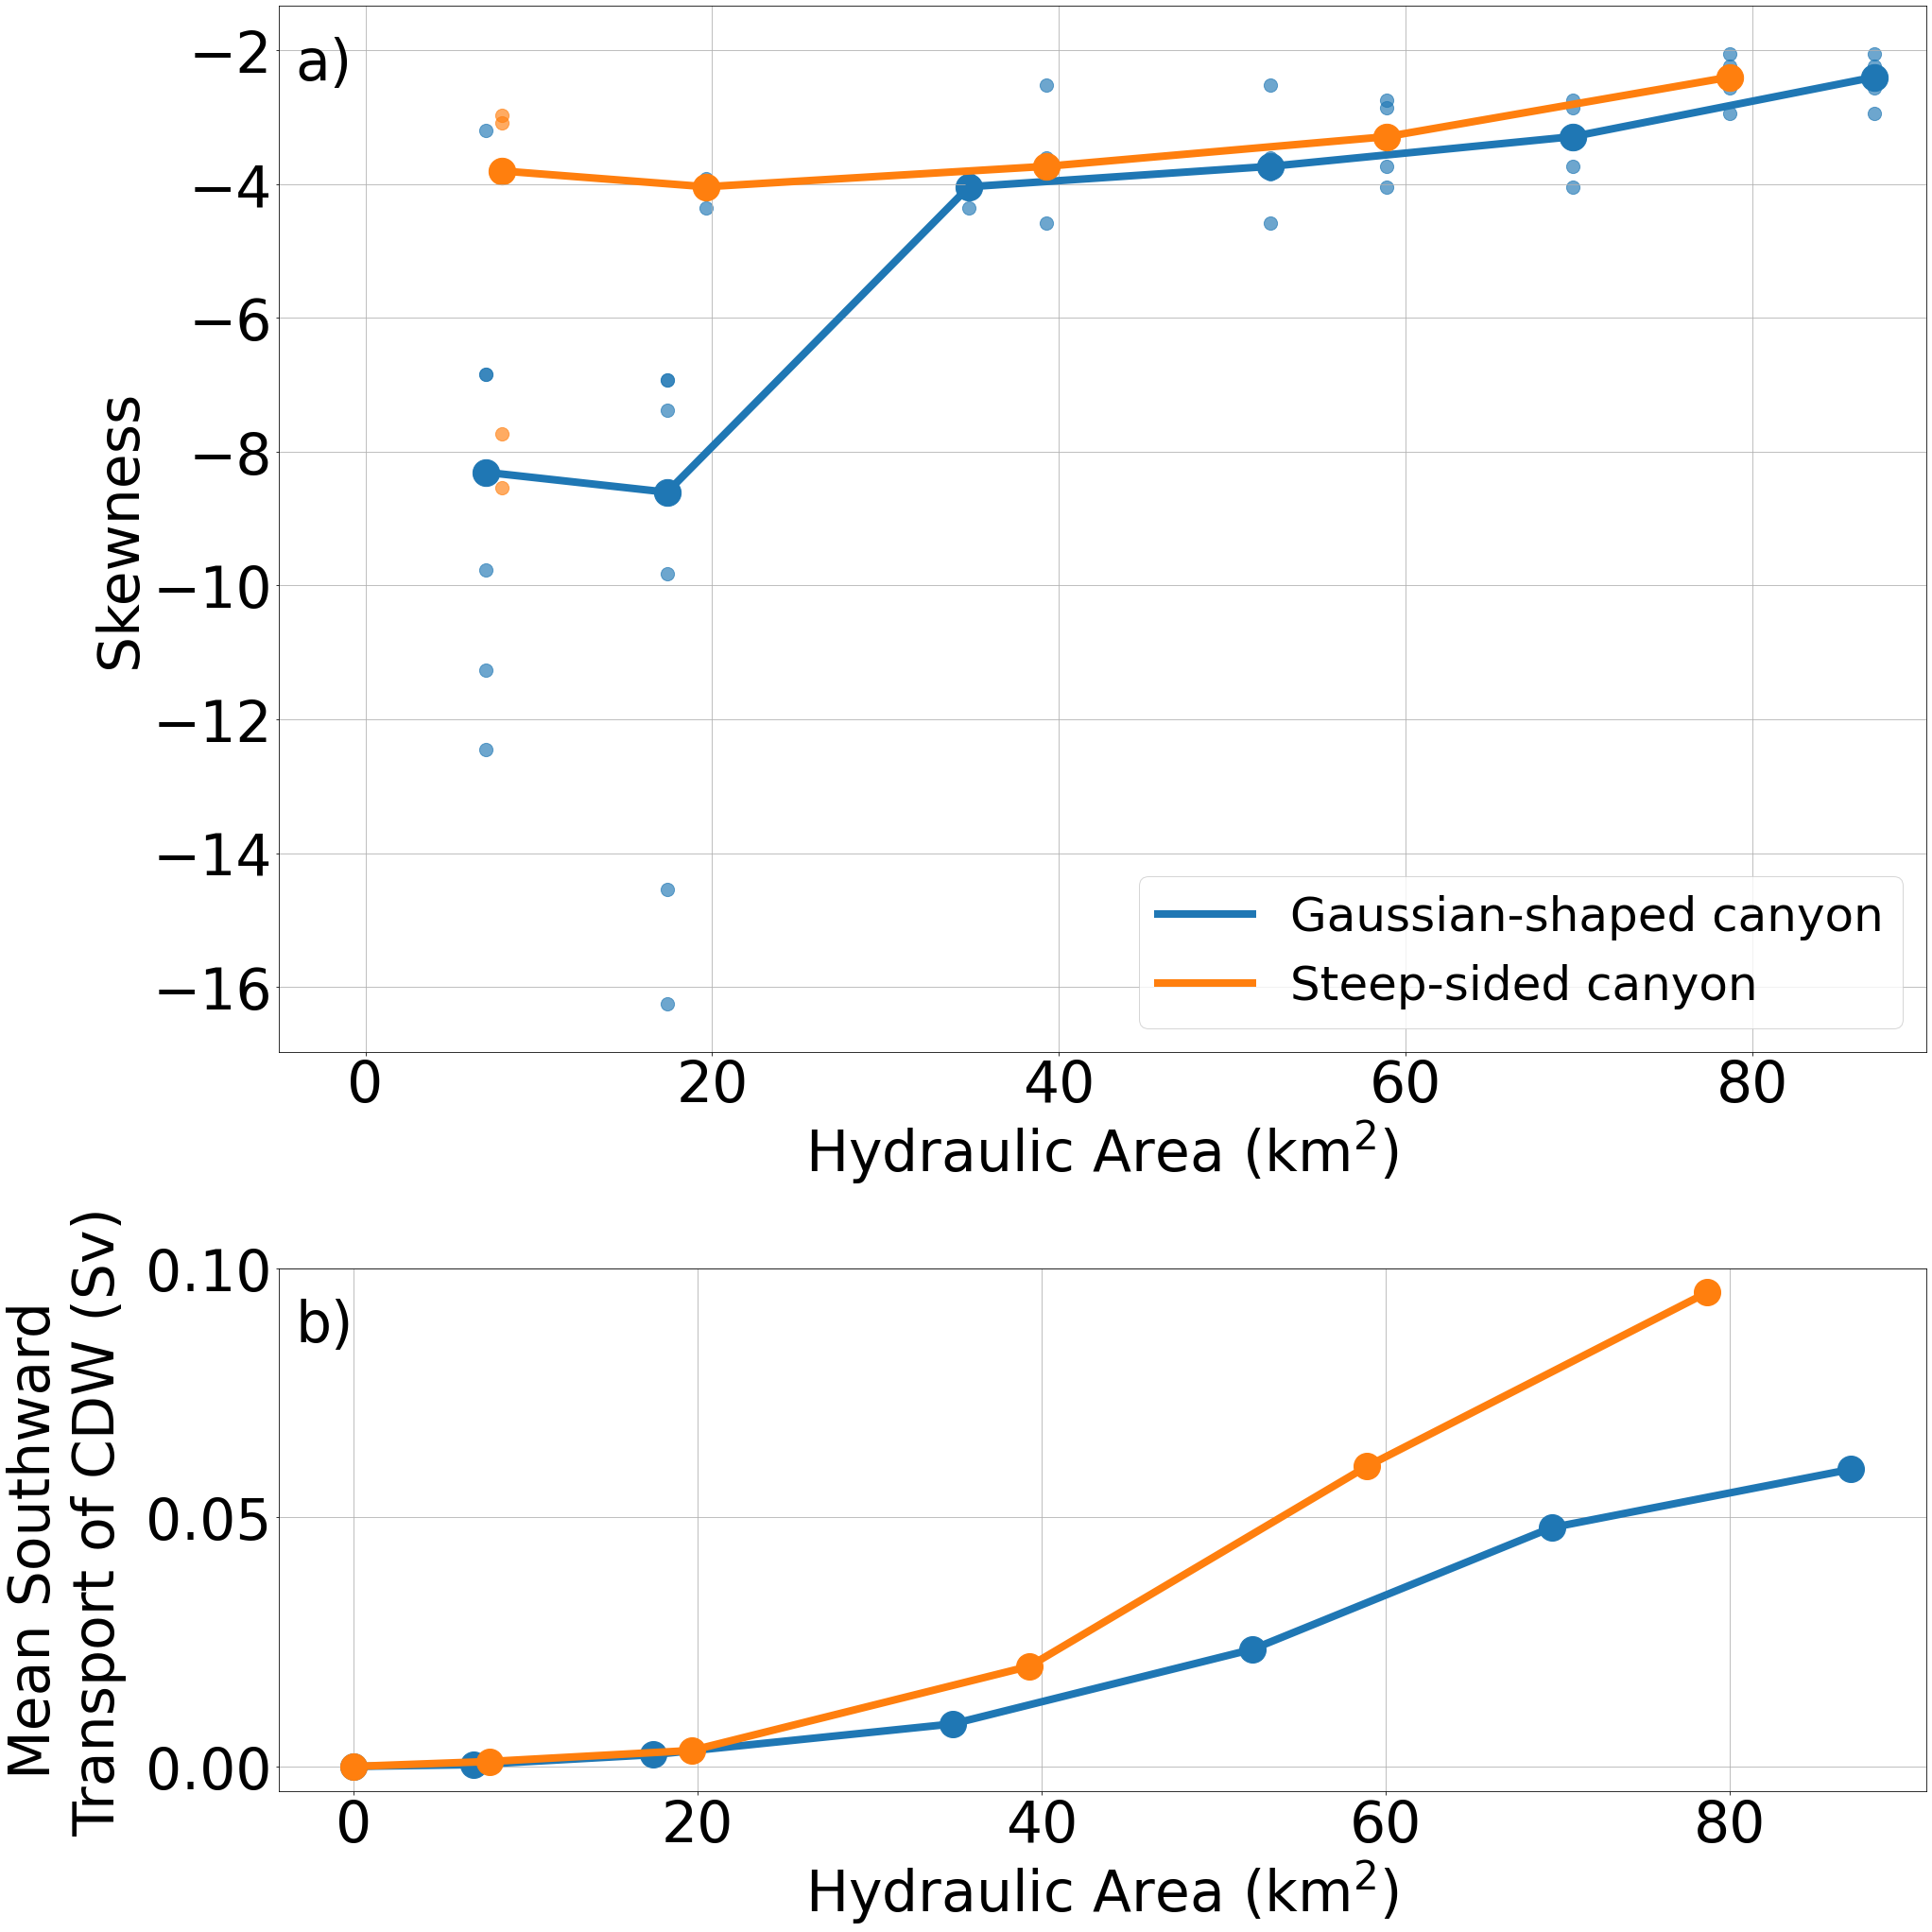

In [28]:
#extra years - skewness of different sections
yticks = np.arange(-12000,500,1000)
fig, axs = plt.subplots(nrows = 2, figsize=(30,30), gridspec_kw={'height_ratios':[2,1]})

axs[0].scatter(np.tile(h_area_fresh[:2]/10**3,(6,1)).T, skewness_fresh_total[:2,:], color = 'C0', s = 200,alpha = 0.65, marker = 'o') #skewness_fresh
axs[0].scatter(h_area_fresh[:2]/10**3,np.median(skewness_fresh_total[:2,:],axis = 1), color = 'C0',s = 800)

axs[0].scatter(np.tile(h_area_fresh[2:]/10**3,(4,1)).T, skewness_fresh_50[2:,:],  color = 'C0', s = 200,alpha = 0.65, marker = 'o') #skewness_fresh
axs[0].scatter(h_area_fresh[2:]/10**3,np.median(skewness_fresh_50[2:,:],axis = 1),color = 'C0', s = 800)
axs[0].plot(h_area_fresh/10**3, median_construct, label = 'Gaussian-shaped canyon', color = 'C0', lw = 8, markersize=28,mew=10) #skewness_fresh


axs[0].scatter(np.tile(h_area_freshSTEEP[:1]/10**3,(6,1)).T, skewness_freshSTEEP_total[:1,:], color = 'C1', s = 200,alpha = 0.65, marker = 'o') #skewness_fresh
axs[0].scatter(h_area_freshSTEEP[:1]/10**3,np.median(skewness_freshSTEEP_total[:1,:],axis = 1), color = 'C1',s = 800)

axs[0].scatter(np.tile(h_area_freshSTEEP[1:]/10**3,(4,1)).T, skewness_freshSTEEP_50[2:,:],  color = 'C0', s = 200,alpha = 0.65, marker = 'o') #skewness_fresh
axs[0].scatter(h_area_freshSTEEP[1:]/10**3,np.median(skewness_freshSTEEP_50[2:,:],axis = 1),color = 'C1', s = 800, zorder = 100)

axs[0].plot(h_area_freshSTEEP/10**3,  median_construct_STEEP, label = 'Steep-sided canyon', color = 'C1', lw = 8 ,markersize=28,mew=10)#skewness_freshSTEEP

axs[0].set_xlabel('Hydraulic Area (km$^{2}$)')
#plt.xticks(np.arange(0,100,10))
axs[0].set_xlim([-5,90])
axs[0].legend(fontsize = 50)

axs[0].annotate('a)',  xy=(0.01, 0.93), xytext=(0, 0),xycoords='axes fraction', textcoords='offset points')
axs[1].annotate('b)',  xy=(0.01, 0.86), xytext=(0, 0),xycoords='axes fraction', textcoords='offset points')

#plt.margins(0.05, 0.05)
axs[0].set_ylabel('Skewness')
axs[0].grid(which='both')

axs[1].plot(np.concatenate((np.expand_dims(h_area_freshzero,axis=0),h_area_fresh))/10**3, np.concatenate((-polewardarray_fresh_latzero,-polewardarray_fresh_lat))/10**6,  marker = 'o', linestyle = '-', lw = 8, markersize=28, label = 'Gaussian-shaped canyon')
axs[1].plot(np.concatenate((np.expand_dims(h_area_freshzero,axis=0),h_area_freshSTEEP))/10**3, np.concatenate((-polewardarray_fresh_latzero,-polewardarray_fresh_latSTEEP))/10**6, marker = 'o', lw = 8, markersize=28, color = 'C1',  label = 'Steep-sided canyon')

axs[1].set_xlabel('Hydraulic Area (km$^{2}$)')
#axs[1].tick_params(labelsize = 26)
#axs[1].yaxis.get_offset_text().set_fontsize(30)
axs[1].set_ylabel('Mean Southward \n Transport of CDW (Sv)', labelpad = 20)
#axs.legend(fontsize = 26)
axs[1].grid(which='both')
axs[1].set_ylim([-0.005,0.1])
fig.tight_layout()

#fig.suptitle('Cross-slope CDW transport with hydraulic canyon area', fontsize = 33, y = 1.03)
#plt.savefig('/g/data/v45/qo9901/layeredASFpaper_fig/Fig_medianskewness_transport_lw_op.pdf')
plt.savefig('/g/data/v45/qo9901/layeredASFpaper_fig/Figlabel_medianskewness_transport_lw_op.pdf')

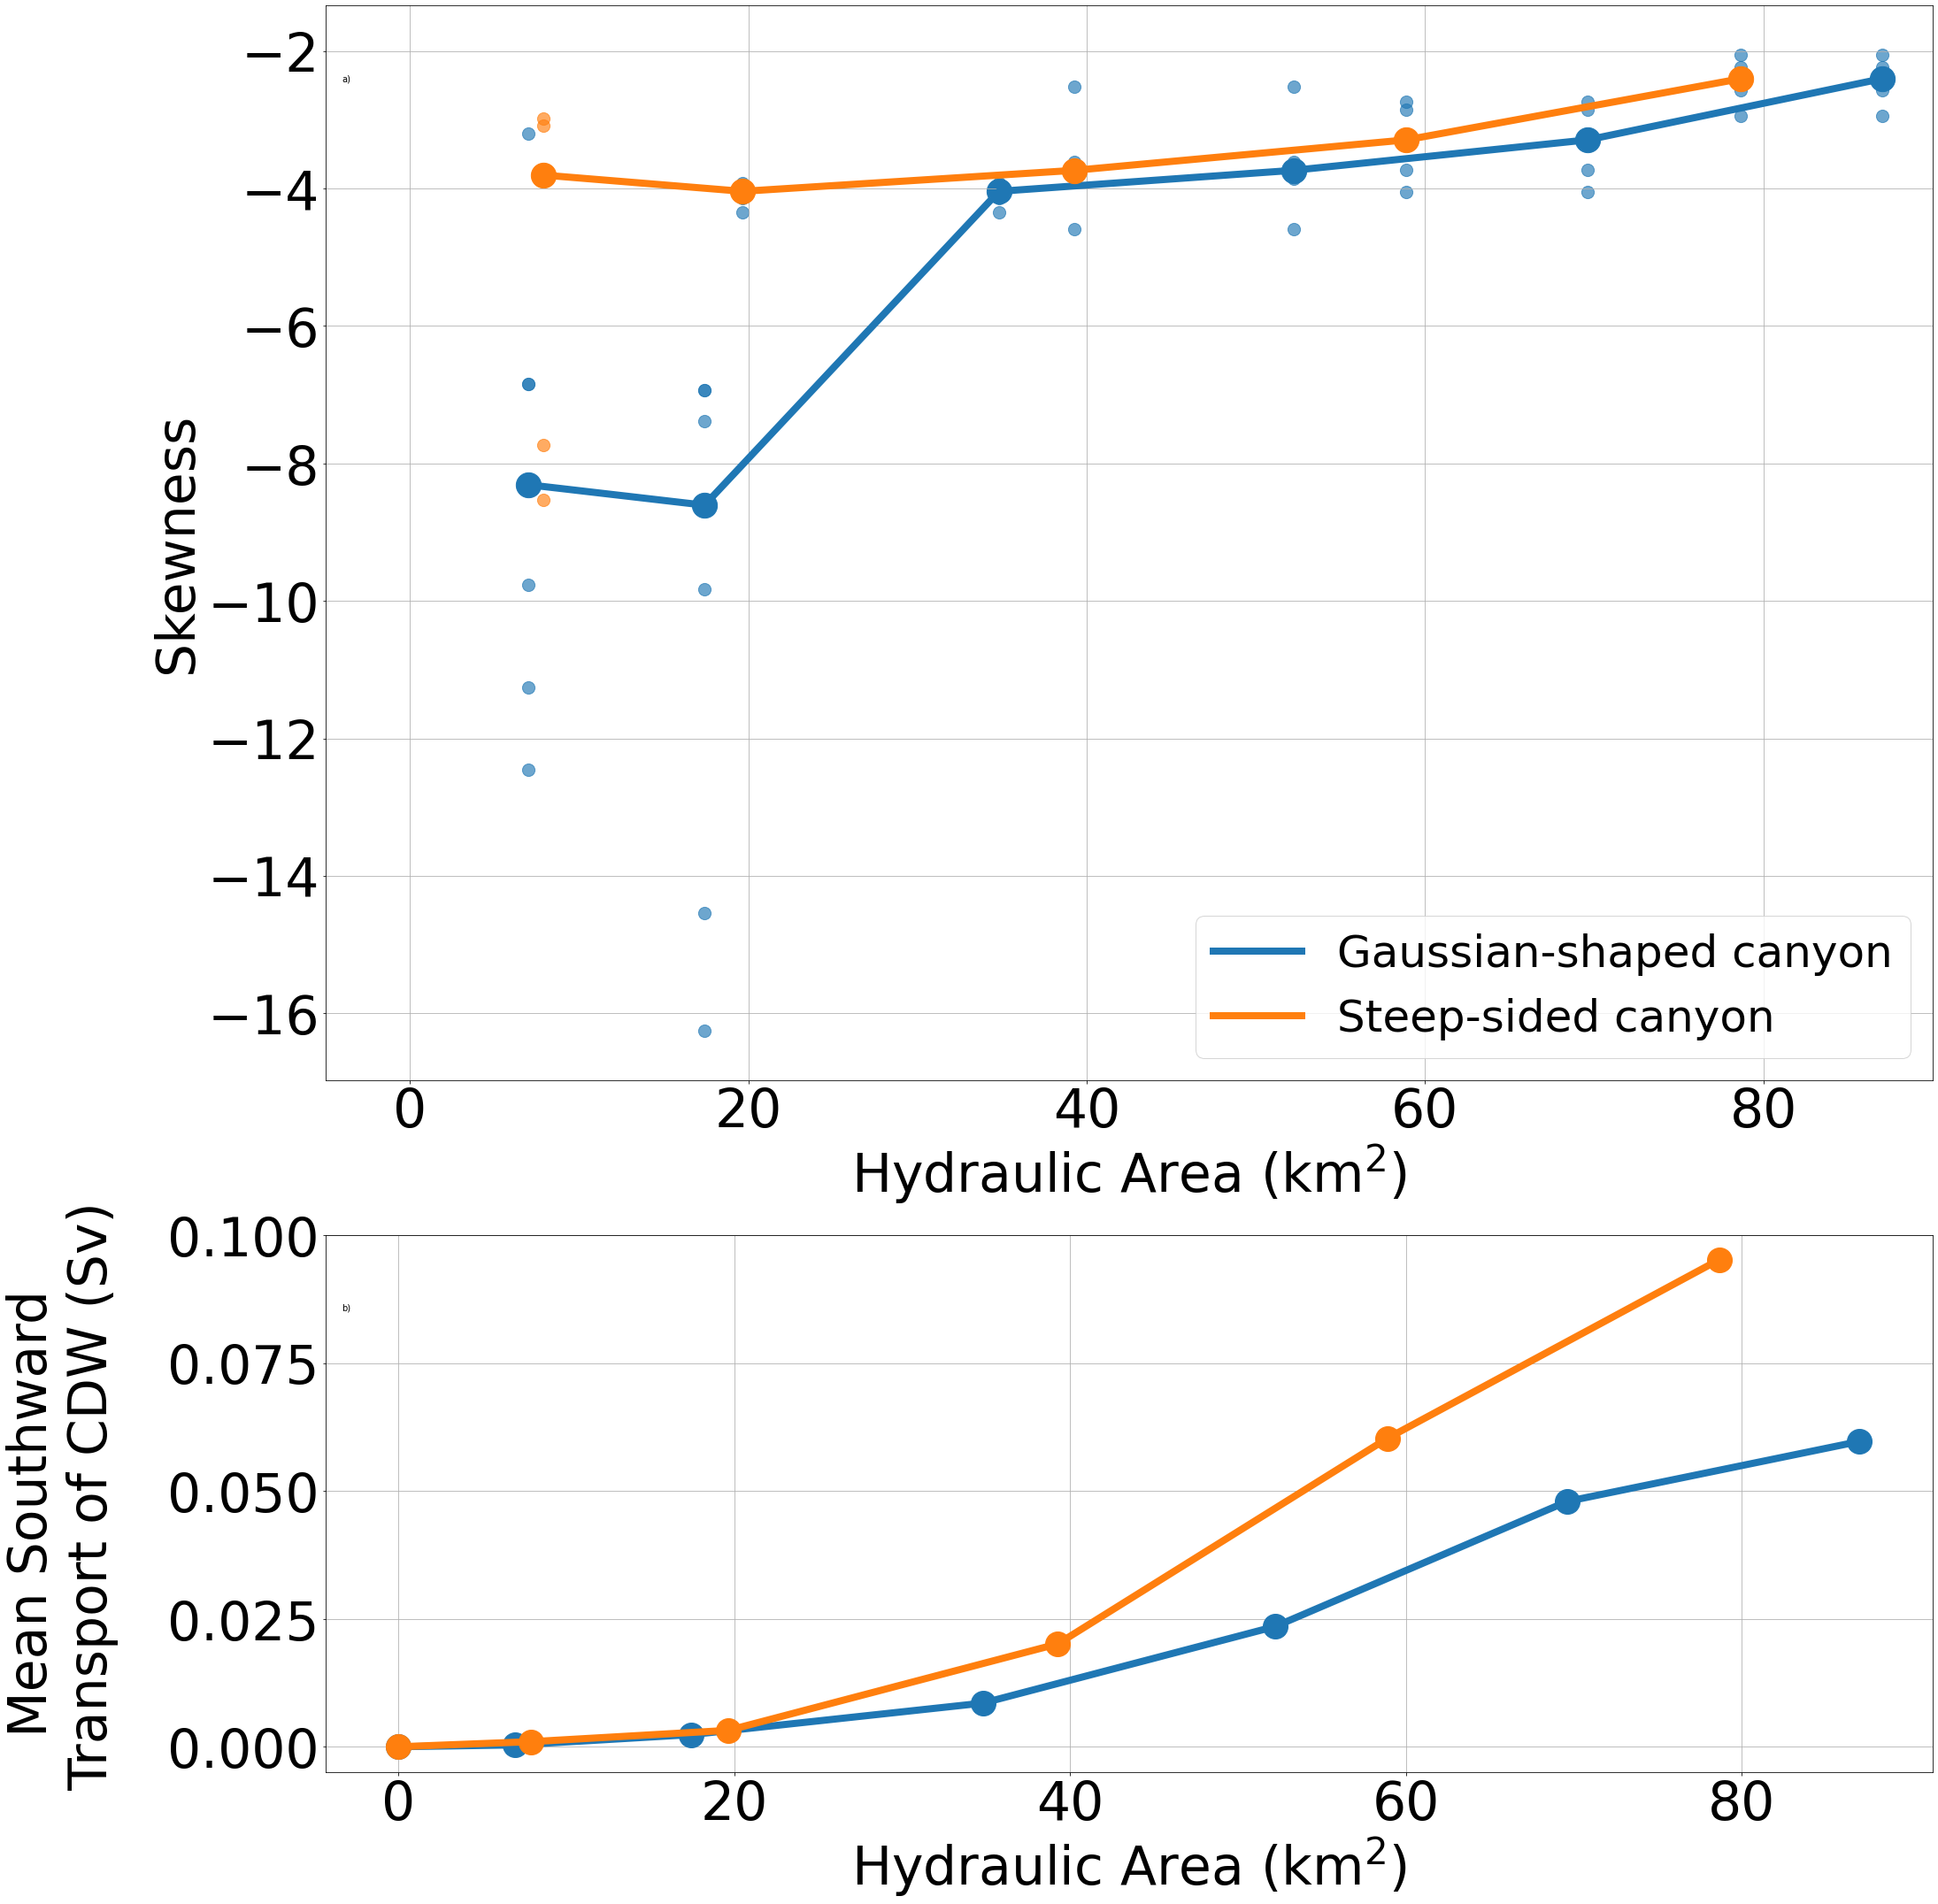

In [38]:
#extra years - skewness of different sections
yticks = np.arange(-12000,500,1000)
fig, axs = plt.subplots(nrows = 2, figsize=(30,30), gridspec_kw={'height_ratios':[2,1]})

axs[0].scatter(np.tile(h_area_fresh[:2]/10**3,(6,1)).T, skewness_fresh_total[:2,:], color = 'C0', s = 200,alpha = 0.65, marker = 'o') #skewness_fresh
axs[0].scatter(h_area_fresh[:2]/10**3,np.median(skewness_fresh_total[:2,:],axis = 1), color = 'C0',s = 800)

axs[0].scatter(np.tile(h_area_fresh[2:]/10**3,(4,1)).T, skewness_fresh_50[2:,:],  color = 'C0', s = 200,alpha = 0.65, marker = 'o') #skewness_fresh
axs[0].scatter(h_area_fresh[2:]/10**3,np.median(skewness_fresh_50[2:,:],axis = 1),color = 'C0', s = 800)
axs[0].plot(h_area_fresh/10**3, median_construct, label = 'Gaussian-shaped canyon', color = 'C0', lw = 8, markersize=28,mew=10) #skewness_fresh


axs[0].scatter(np.tile(h_area_freshSTEEP[:1]/10**3,(6,1)).T, skewness_freshSTEEP_total[:1,:], color = 'C1', s = 200,alpha = 0.65, marker = 'o') #skewness_fresh
axs[0].scatter(h_area_freshSTEEP[:1]/10**3,np.median(skewness_freshSTEEP_total[:1,:],axis = 1), color = 'C1',s = 800)

axs[0].scatter(np.tile(h_area_freshSTEEP[1:]/10**3,(4,1)).T, skewness_freshSTEEP_50[2:,:],  color = 'C0', s = 200,alpha = 0.65, marker = 'o') #skewness_fresh
axs[0].scatter(h_area_freshSTEEP[1:]/10**3,np.median(skewness_freshSTEEP_50[2:,:],axis = 1),color = 'C1', s = 800, zorder = 100)

axs[0].plot(h_area_freshSTEEP/10**3,  median_construct_STEEP, label = 'Steep-sided canyon', color = 'C1', lw = 8 ,markersize=28,mew=10)#skewness_freshSTEEP

axs[0].set_xlabel('Hydraulic Area (km$^{2}$)')
#plt.xticks(np.arange(0,100,10))
axs[0].set_xlim([-5,90])
axs[0].legend(fontsize = 50)

axs[0].annotate('a)',  xy=(0.01, 0.93), xytext=(0, 0),xycoords='axes fraction', textcoords='offset points')
axs[1].annotate('b)',  xy=(0.01, 0.86), xytext=(0, 0),xycoords='axes fraction', textcoords='offset points')

#plt.margins(0.05, 0.05)
axs[0].set_ylabel('Skewness')
axs[0].grid(which='both')

axs[1].plot(np.concatenate((np.expand_dims(h_area_freshzero,axis=0),h_area_fresh))/10**3, np.concatenate((-polewardarray_fresh_latzero,-polewardarray_fresh_lat))/10**6,  marker = 'o', linestyle = '-', lw = 8, markersize=28, label = 'Gaussian-shaped canyon')
axs[1].plot(np.concatenate((np.expand_dims(h_area_freshzero,axis=0),h_area_freshSTEEP))/10**3, np.concatenate((-polewardarray_fresh_latzero,-polewardarray_fresh_latSTEEP))/10**6, marker = 'o', lw = 8, markersize=28, color = 'C1',  label = 'Steep-sided canyon')

axs[1].set_xlabel('Hydraulic Area (km$^{2}$)')
#axs[1].tick_params(labelsize = 26)
#axs[1].yaxis.get_offset_text().set_fontsize(30)
axs[1].set_ylabel('Mean Southward \n Transport of CDW (Sv)', labelpad = 55)
#axs.legend(fontsize = 26)
axs[1].grid(which='both')
axs[1].set_ylim([-0.005,0.1])
fig.tight_layout()

#fig.suptitle('Cross-slope CDW transport with hydraulic canyon area', fontsize = 33, y = 1.03)
#plt.savefig('/g/data/v45/qo9901/layeredASFpaper_fig/Fig_medianskewness_transport_lw_op.pdf')
plt.savefig('/g/data/v45/qo9901/layeredASFpaper_fig/Figlabel_medianskewness_transport_lw_op.pdf')

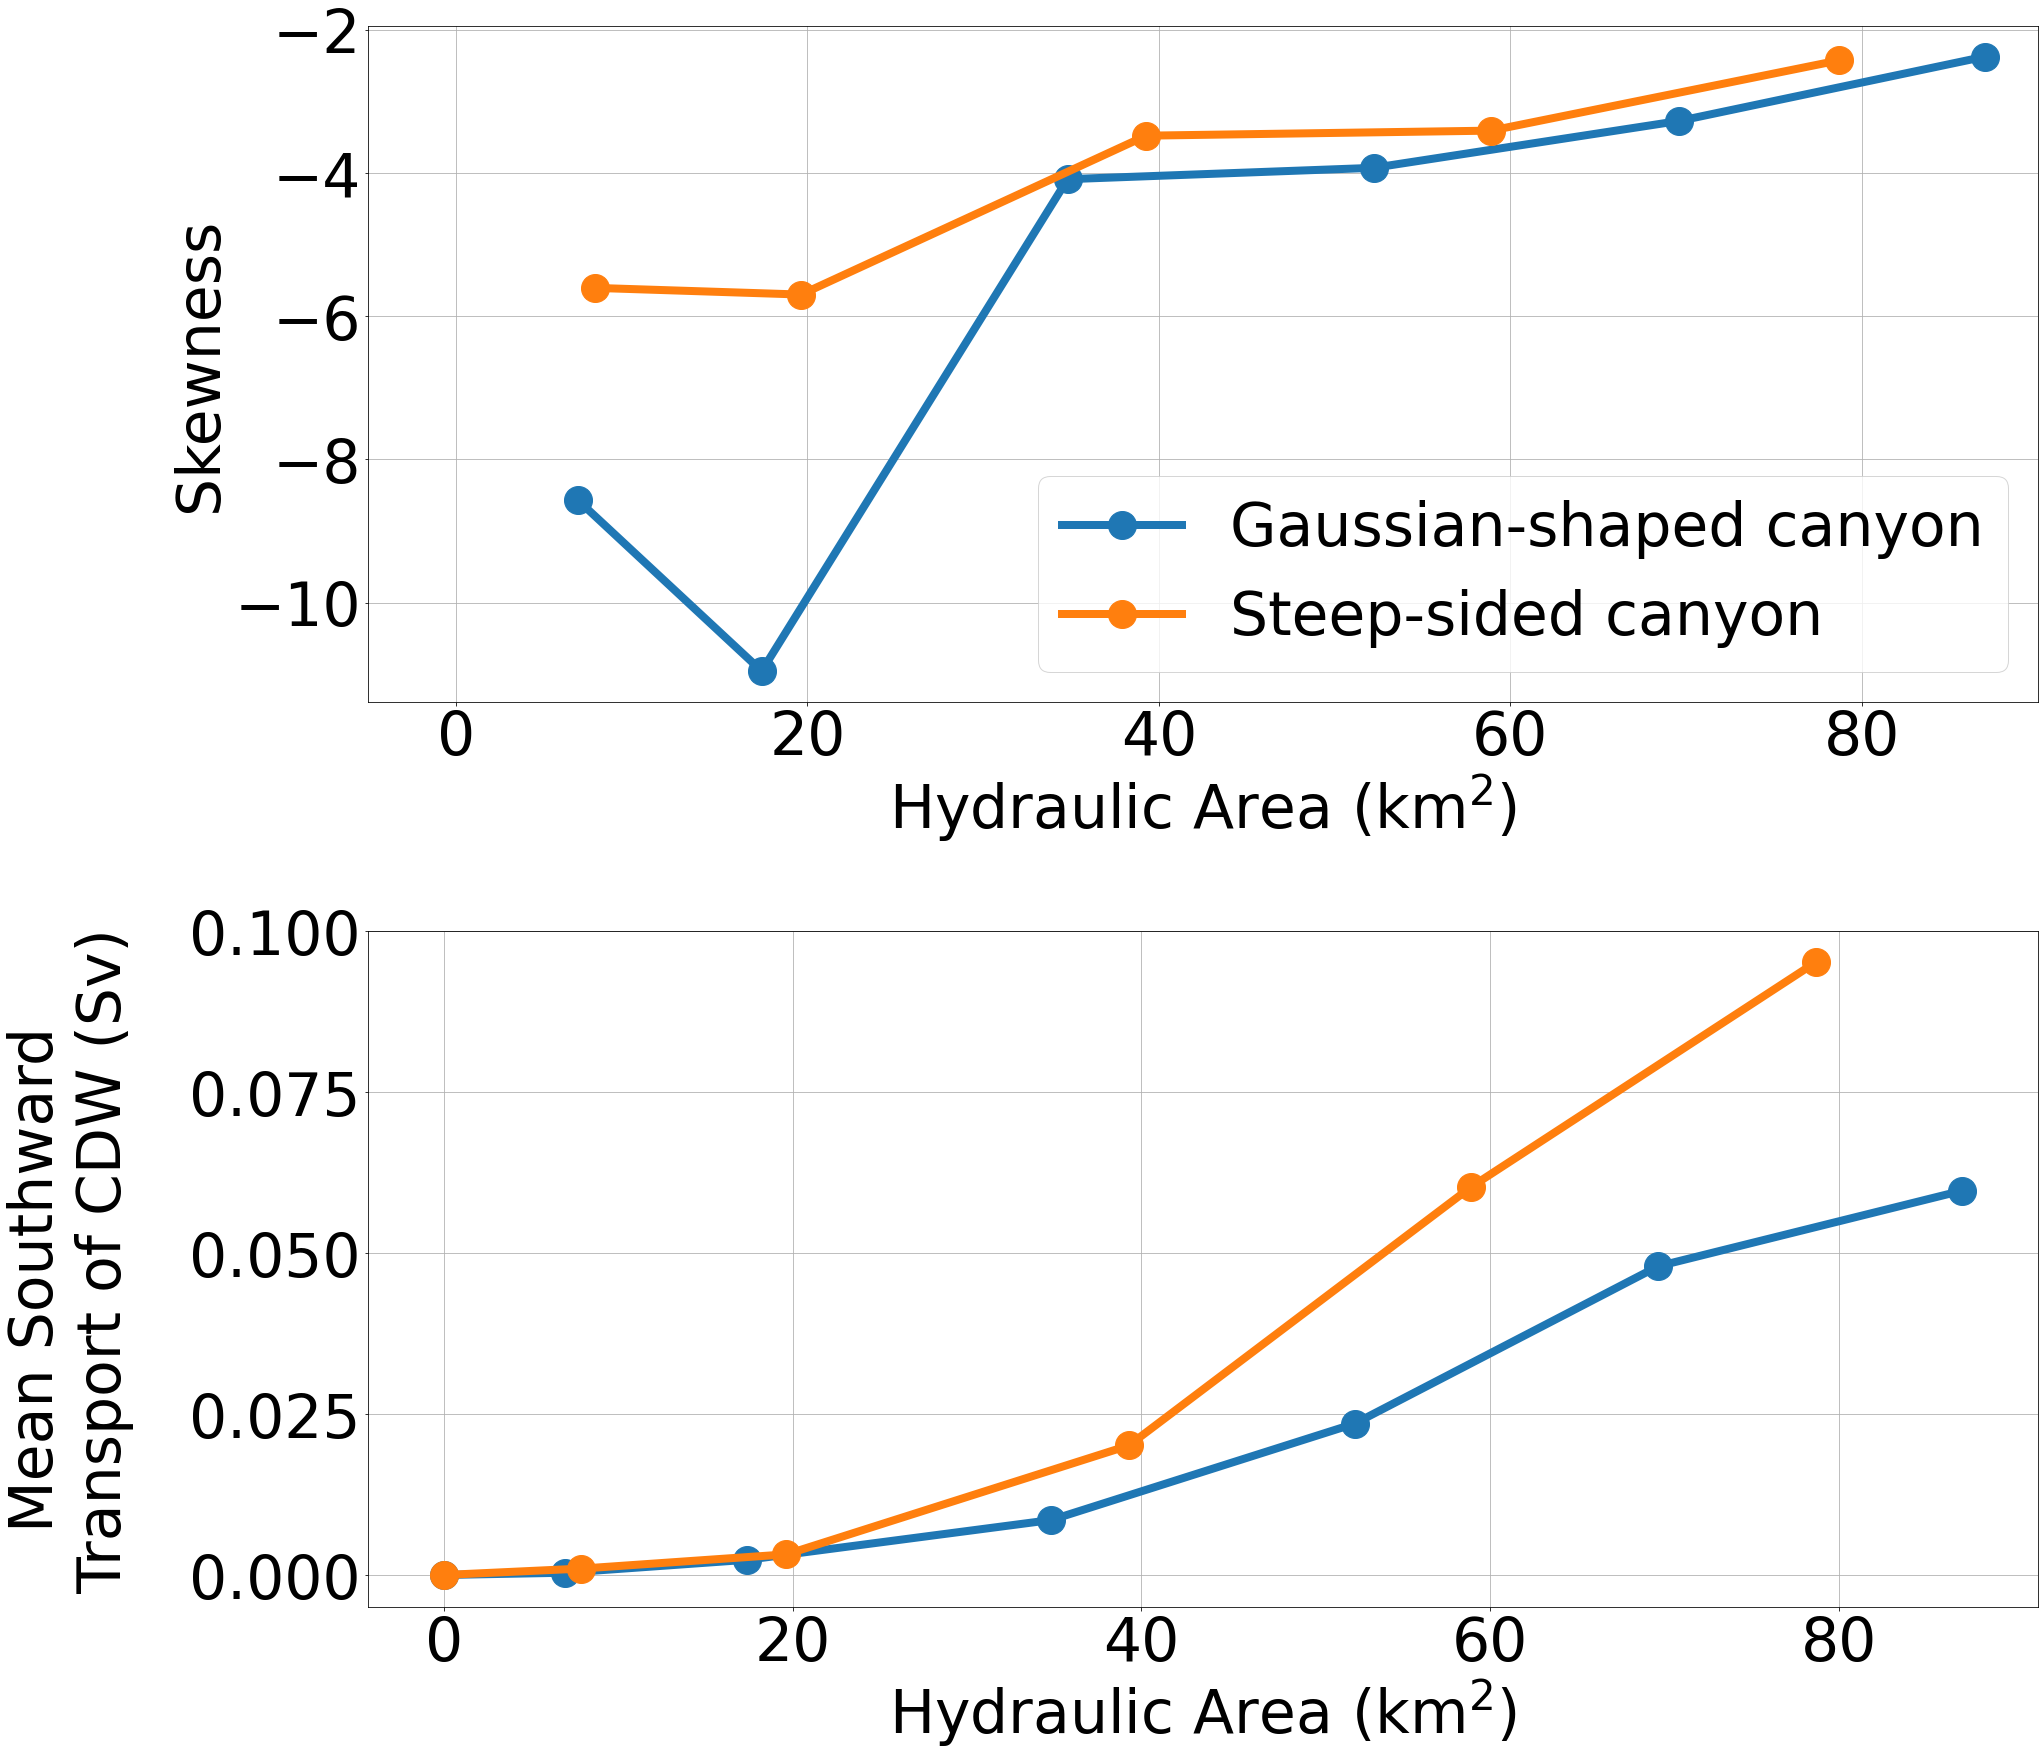

In [47]:
yticks = np.arange(-12000,500,1000)
fig, axs = plt.subplots(nrows = 2, figsize=(30,26))

axs[0].plot(h_area_fresh/10**3, skewness_fresh_total, label = 'Gaussian-shaped canyon', marker = 'o', lw = 8, markersize=28) #skewness_fresh
axs[0].plot(h_area_freshSTEEP/10**3,  skewness_freshSTEEP_total, label = 'Steep-sided canyon', color = 'C1', marker = 'o', lw = 8 ,markersize=28)#skewness_freshSTEEP
axs[0].set_xlabel('Hydraulic Area (km$^{2}$)')
#plt.xticks(np.arange(0,100,10))
axs[0].set_xlim([-5,90])
axs[0].legend(fontsize = 60)


#plt.margins(0.05, 0.05)
axs[0].set_ylabel('Skewness')
axs[0].grid(which='both')

axs[1].plot(np.concatenate((np.expand_dims(h_area_freshzero,axis=0),h_area_fresh))/10**3, np.concatenate((-polewardarray_fresh_latzero,-polewardarray_fresh_lat))/10**6,  marker = 'o', linestyle = '-', lw = 8, markersize=28, label = 'Gaussian-shaped canyon')
axs[1].plot(np.concatenate((np.expand_dims(h_area_freshzero,axis=0),h_area_freshSTEEP))/10**3, np.concatenate((-polewardarray_fresh_latzero,-polewardarray_fresh_latSTEEP))/10**6, marker = 'o', lw = 8, markersize=28, color = 'C1',  label = 'Steep-sided canyon')

axs[1].set_xlabel('Hydraulic Area (km$^{2}$)')
#axs[1].tick_params(labelsize = 26)
#axs[1].yaxis.get_offset_text().set_fontsize(30)
axs[1].set_ylabel('Mean Southward \n Transport of CDW (Sv)', labelpad = 55)
#axs.legend(fontsize = 26)
axs[1].grid(which='both')
axs[1].set_ylim([-0.005,0.1])
fig.tight_layout()
plt.savefig('/g/data/v45/qo9901/layeredASFpaper_fig/Fig4_skewness_transport_lwextrayr.pdf')